# FFT Erzeugen und zwischen Pfiff und kein Pfiff vergleichen

In diesem Notebook werden die Audio-Dateien eingelesen und in eine liste der Einzelnen Abtastpunkte umgewandelt. Anschließend wird mithilfe der scipy Bibliothek ein FFT erstellt. Dabei wird einmal ein Teil der Audiodatei verarbeitet in dem ein Pfiff zu hören ist und anschlißend ein Teil der Audiodatei in der Kein Pfiff zu kören ist. Somit können diese miteinander verglichen werden. 

In [1]:
import os
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.fftpack import fft, fftfreq

## Datei einlesen

Einlesen der Abtastpunkte aus der Audiodatei

In [2]:
cwd = os.getcwd()
src_dir = os.path.join(cwd, os.pardir)
data_dir = os.path.join(src_dir, 'data')

raw_sound_data, samplerate = sf.read(data_dir + '/Atlas_3_1.flac')

# Konvertierung in ein angenehmeres Format 
sound_data = {}
#sound_data['front-left'] = [x[2] for x in raw_sound_data]
#sound_data['front-right'] = [x[3] for x in raw_sound_data]
sound_data['back-left'] = [x[0] for x in raw_sound_data]
#sound_data['back-right'] = [x[1] for x in raw_sound_data]

## Plot der ersten Sekunde

Zur Visualisierung der Audio-Datei wird ein Plot für die erste Sekunde erstellt. Dise geschieht unter zuhilfenahme einer Funktion zum umwandeln der Timestamps in konkrete Indizes in der Liste der Abtastpunkte

In [3]:
def sample_index(timestamp):
    return round(timestamp * samplerate, 0)

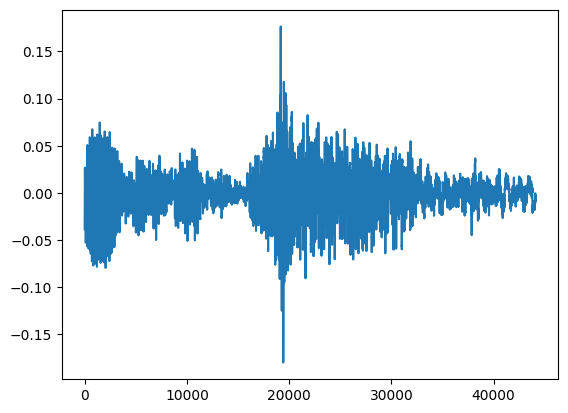

In [4]:
plt.plot(sound_data['back-left'][sample_index(0):sample_index(1)])
plt.show()

## FFT

Generierung der Einzelnen Frequenzanteile aus den Abtastpunkten mithilfe der FFT

### Ohne Pfiff
FFT für eine Sekunde ohne Pfiff

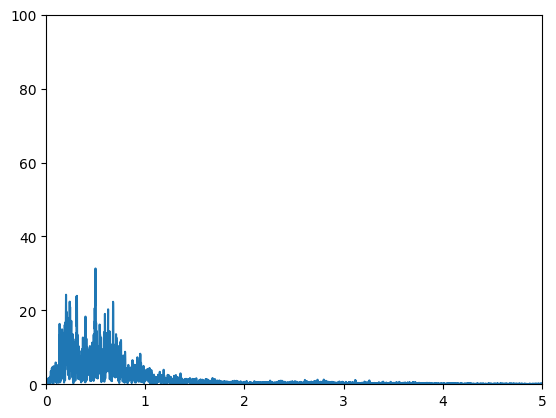

In [5]:
fft_data = fft(sound_data['back-left'][sample_index(148):sample_index(149)])
fft_freq = fftfreq(sample_index(149) - sample_index(148), 1 / 44100)
plt.plot(fft_freq[:fft_freq.size // 2] / 1000, np.abs(fft_data)[:fft_data.size // 2])
plt.axis([0, 5, 0, 100])
plt.show()

### Mit Pfiff
FFT für eine Sekunde mit Pfiff

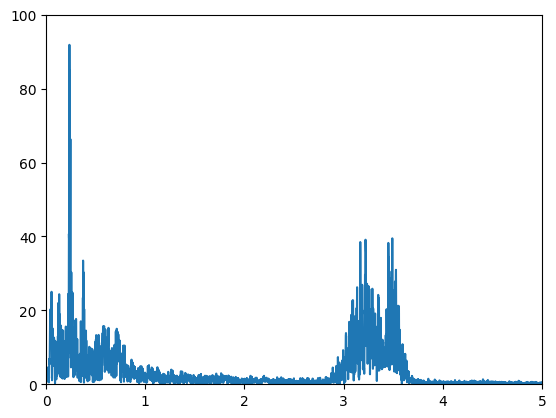

In [6]:
fft_data = fft(sound_data['back-left'][sample_index(150):sample_index(151)])
fft_freq = fftfreq(sample_index(151) - sample_index(150), 1 / 44100)
plt.plot(fft_freq[:fft_freq.size // 2] / 1000, np.abs(fft_data)[:fft_data.size // 2])
plt.axis([0, 5, 0, 100])
plt.show()